In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier

C:\Mysoftware\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
### 1. 载入Airbnb数据
data_path = 'boston-airbnb-open-data'

file_name_calendar = 'calendar.csv'
raw_data_calendar = pd.read_csv(data_path + '\\' + file_name_calendar)

file_name_listings = 'listings.csv'
raw_data_listings = pd.read_csv(data_path + '\\' + file_name_listings)

file_name_reviews = 'reviews.csv'
raw_data_reviews = pd.read_csv(data_path + '\\' + file_name_reviews)

## 1. 数据探索

In [3]:
# 查看三个数据集大小
print(raw_data_calendar.shape,raw_data_listings.shape,raw_data_reviews.shape)

(1308890, 4) (3585, 95) (68275, 6)


### 1.1 查看calendar数据

In [27]:
raw_data_calendar.head()

,listing_id,date,available,price,month
0,12147973,2017-09-05,f,NaN,2017-09
1,12147973,2017-09-04,f,NaN,2017-09
2,12147973,2017-09-03,f,NaN,2017-09
3,12147973,2017-09-02,f,NaN,2017-09
4,12147973,2017-09-01,f,NaN,2017-09


In [5]:
raw_data_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [31]:
raw_data_calendar.date.min(), raw_data_calendar.date.max()

('2016-09-06', '2017-09-05')

In [34]:
occupied_days_df = raw_data_calendar[raw_data_calendar['available']=='f'].groupby('listing_id').count()
max_record_date_df = raw_data_calendar[['listing_id','date']].groupby('listing_id').max()
min_record_date_df = raw_data_calendar[['listing_id','date']].groupby('listing_id').min()

In [42]:
record_delta_df = pd.merge(min_record_date_df, max_record_date_df, left_index=True, right_index=True)
record_delta_df['date_y'].max(), record_delta_df['date_x'].max()

('2017-09-05', '2016-09-06')

### 1.2 查看review数据

In [6]:
raw_data_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


### 1.3 查看listings数据

In [7]:
raw_data_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [239]:
raw_data_listings.last_review.dropna().max(), raw_data_listings.first_review.dropna().min()

('2016-09-06', '2009-03-21')

In [240]:
raw_data_listings.host_since.dropna().max(), raw_data_listings.host_since.dropna().min()

('2016-09-06', '2008-11-11')

In [8]:
# 定义查看数据信息的函数
def view_data_info(df):
    data_info_lis = []
    data_columns = ['特征名称','取值种类数','空值数量','数据类型','数据采样']
    for col_num, col_name in enumerate(df.columns):
        if len(str(df.iloc[0,col_num])) < 50:
            data_info_lis.append([col_name,
                                  len(df[col_name].value_counts()),
                                  df[col_name].isna().sum(),
                                  df.dtypes[col_name],
                                  df.iloc[0,col_num]])
    data_info_df = pd.DataFrame(data_info_lis, columns=data_columns)
    return data_info_df

In [9]:
# 查看listing表中的数据信息
view_data_info(raw_data_listings)

,特征名称,取值种类数,空值数量,数据类型,数据采样
0,id,3585,0,int64,12147973
1,listing_url,3585,0,object,https://www.airbnb.com/rooms/12147973
2,scrape_id,1,0,int64,20160906204935
3,last_scraped,1,0,object,2016-09-07
4,name,3504,0,object,Sunny Bungalow in the City
5,experiences_offered,1,0,object,none
6,notes,1269,1975,object,NaN
7,interaction,1617,1554,object,NaN
8,host_id,2181,0,int64,31303940
9,host_url,2181,0,object,https://www.airbnb.com/users/show/31303940


## 2、根据对数据的探索确定分析过程中要回答的三个问题：
- 问题1：店铺入住情况在一年中是怎样变化的？
- 问题2：什么样的店铺入住率高？
- 问题3：什么样的店铺最令顾客满意（评分高）？

## 2.1、数据预处理

In [175]:
# 价格空缺值处理方法：
## 对*cleaning_fee、security_deposit、extra_people* 中的空缺值，视其为未声明即不收费所以用0填充；
## 对*weekly_price* 和 *monthly_price* ，根据*price*按时间比例推算。

def date_fea_convert(df, col_name_lis, n_lis):
    # 输入：df:输入的全量待操作DataFrame；col_name_lis: 待替换的列名称集合；n_lis: 待替换的列是"price"列值的几倍列表
    # 输出：替换后的全量DataFrame

    # 对于col_name中的非空值转化为float类型（先去除字符串中的"$"和","再转化）
    for i, col_name in enumerate(col_name_lis):
        #try:
        temp_df_1 = df[col_name][~df[col_name].isna()].copy()
        df[col_name][~df[col_name].isna()] = temp_df_1.apply(lambda str: float(str[1:].replace(',', '')))
        #except:
        #    print(temp_df_1.head())
        # 对于col_name中的空值根据price按比例推算
        if n_lis[i]:
            temp_df_2 = df['price'][df[col_name].isna()].copy()
            df[col_name][df[col_name].isna()] = temp_df_2.apply(lambda x: x * n_lis[i])
        else:
            df[col_name][df[col_name].isna()] = 0
    return df

In [176]:
# 将各个店铺入住天数数据与listing表结合
occupied_df = raw_data_calendar[['listing_id', 'available']][raw_data_calendar['available']=='f'].groupby('listing_id').count()
occupied_df = occupied_df.rename(columns={"available":"occupied_days"})
merged_df = pd.merge(raw_data_listings,occupied_df, left_on = 'id', right_index=True, how='inner')

# 丢掉只有单一值的列
val_counts_1 = [col_name for col_name in merged_df.columns 
                 if len(merged_df[col_name].value_counts()) <= 1]
listing_preprocess_df_1 = merged_df.drop(val_counts_1, axis=1)

# 删除目标值缺失的行
listing_preprocess_df_2 = listing_preprocess_df_1.dropna(subset=['number_of_reviews','occupied_days', 'review_scores_value'], axis=0).copy()

# 删除无用的列
listing_preprocess_df_3 = listing_preprocess_df_2.drop(['host_url', 'listing_url','zipcode'], axis=1).copy()

# 去除[['host_response_rate','host_acceptance_rate']]两个特征中的百分号
listing_preprocess_df_4 = listing_preprocess_df_3.replace({'%': ''}, regex=True).copy()

## 对*cleaning_fee、security_deposit、extra_people* 中的空缺值，视其为未声明即不收费所以用0填充；
## 对*weekly_price* 和 *monthly_price* ，根据*price*按时间比例推算。
listing_preprocess_df_5 = date_fea_convert(listing_preprocess_df_4, ['cleaning_fee'
                                                                     ,'price'
                                                                     ,'weekly_price'
                                                                     ,'monthly_price'
                                                                     ,'security_deposit'
                                                                     ,'extra_people'], [0, 1, 7, 30, 0, 0])

# 将日期变量转化为距最后日期的天数
test_df  = listing_preprocess_df_5[['host_since', 'first_review', 'last_review']].copy()
max_time_str = test_df.max().max()
max_datetime = datetime.strptime(max_time_str, '%Y-%m-%d')

test_df = test_df.applymap(lambda x: (datetime.now() - datetime(list(map(int, x.split('-')))[0],
                                                      list(map(int, x.split('-')))[1],
                                                      list(map(int, x.split('-')))[2])).days)
listing_preprocess_df_5[['host_since', 'first_review', 'last_review']] = test_df

# 计算calender表中的入住率,时间区间2016-09-06到2017-09-05
day_delta = (datetime(2017, 9, 5)-datetime(2016, 9, 6)).days
listing_preprocess_df_5['occupied_ratio'] = listing_preprocess_df_5['occupied_days']/day_delta


# 对响应率、接收率进行众数填充
for col_nm in ['host_response_rate', 'host_acceptance_rate']:
    listing_preprocess_df_5[col_nm].fillna(listing_preprocess_df_5[col_nm].mode()[0], inplace=True)
    
# 类别变量编码： 对取值种类小于等于*class_num*，且数值类型为*object*的特征进行one-hot编码
class_num = 10

# 选取类别变量
processed_data_info = view_data_info(listing_preprocess_df_5)
index1 = processed_data_info['取值种类数'] <= class_num
index2 = processed_data_info['数据类型'] == object
to_get_dummy_df = processed_data_info[index1 & index2]

# 对类别变量编码
get_dummied_df = pd.get_dummies(listing_preprocess_df_5[to_get_dummy_df['特征名称'].values])

# 原数据中丢掉类别变量
listing_preprocess_df_6 = listing_preprocess_df_5.drop(to_get_dummy_df['特征名称'].values, axis=1).copy()

# 将丢掉类别变量的数据与one_hot编码之后的类别变量数据结合，构成新的特征集
listing_preprocess_df_7 = pd.concat([listing_preprocess_df_6, get_dummied_df], sort=False, axis=1)

# 构造特征：首末次浏览时差
listing_preprocess_df_7['review_delta'] = listing_preprocess_df_7['first_review'] - listing_preprocess_df_7['last_review']

# 查看处理后的数据
view_data_info(listing_preprocess_df_7).head()

C:\Mysoftware\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Mysoftware\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Mysoftware\Anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,特征名称,取值种类数,空值数量,数据类型,数据采样
0,id,2703,0,int64,3075044
1,name,2654,0,object,Charming room in pet friendly apt
2,host_id,1697,0,int64,2572247
3,host_name,1086,0,object,Andrea
4,host_since,1111,0,int64,2494


## 2.2、筛选入模变量

In [123]:
# 编码后的类别特征+处理后的日期数据+处理后的价格和比率数据+目标值
cate_fea = list(get_dummied_df.columns)
date_fea = ['host_since', 'first_review', 'last_review']
#date_fea = ['review_delta']
rate_and_price_fea = ['host_response_rate',
                        'cleaning_fee',
                        'host_acceptance_rate',
                        'price',
                        #'weekly_price',
                        #'monthly_price',
                        'security_deposit',
                        'extra_people']
availability_fea = ['availability_30','availability_60','availability_90', 'availability_365']

# 入模变量+目标变量
fea_lis = cate_fea + date_fea + rate_and_price_fea #+ availability_fea
#fea_lis = date_fea + rate_and_price_fea
obj_lis = ['reviews_per_month', 'number_of_reviews','occupied_ratio','review_scores_value']

fea_data = listing_preprocess_df_7[fea_lis]
obj_data = listing_preprocess_df_7[obj_lis]

## 2.3、调试模型
- 分别使用回归模型和多分类模型对入住率和评分进行预测，用以分析各个特征对入住率和评分的影响

In [124]:
# 用随机森林回归，分析入住率与特征之间的关系
test_size = .2
random_state = 10

#split the data into train and test
#X_train, X_test, y_train, y_test = train_test_split(fea_data, obj_data['number_of_reviews'], test_size = test_size, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(fea_data, obj_data['occupied_ratio'], test_size = test_size, random_state=random_state)

#fit the model and obtain pred response
#model_reg = LinearRegression(normalize=True)
model_reg = RandomForestRegressor(max_depth=20,random_state=random_state,n_estimators=50, min_samples_leaf=3)
model_reg.fit(X_train, y_train)
y_test_preds = model_reg.predict(X_test)
y_train_preds = model_reg.predict(X_train)

print(r2_score(y_test, y_test_preds), r2_score(y_train, y_train_preds))
print(mean_squared_error(y_test, y_test_preds), mean_squared_error(y_train, y_train_preds))

0.33105916710338723 0.7900605262567743
0.09636545120453456 0.030374565808660003


In [132]:
# 用GBDT分类，分析入满意度评分与特征之间的关系
test_size = .2
random_state = 10

X_train, X_test, y_train, y_test = train_test_split(fea_data, obj_data['review_scores_value'],\
                                                    test_size = test_size,\
                                                    random_state=random_state)
model_clf = GradientBoostingClassifier(n_estimators=20,\
                                       learning_rate=0.2,\
                                       max_depth=5,\
                                       random_state=random_state,\
                                       min_samples_leaf=10).fit(X_train, y_train)
model_clf.score(X_test, y_test), model_clf.score(X_train, y_train)

(0.5582255083179297, 0.799722479185939)

## 3.1、 问题1：店铺入住情况在一年中是怎样变化的？

In [246]:
def doub_ylabel_plot(df_1, df_2, fea_1, fea_2, group_fea):
    # 输入：待观察变量组成的DataFrame
    #plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    #plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    
    df_1[fea_2] = df_2.iloc[:, 1]
    
    col_nm_1 = df_1.columns[0]
    col_nm_2 = df_1.columns[1]
    df = df_1.rename(columns={col_nm_1:group_fea, col_nm_2:fea_1})

    fig, ax1 = plt.subplots()

    ax1 = df[fea_1].plot(xticks=df.index)
    ax2 = df[fea_2].plot(secondary_y=True)

    #ax1 = df['occupied_count'].plot(); 
    ax1.set_ylabel(fea_1, fontsize=18)

    #ax =  = df['average_price'].plot(); 
    ax2.set_ylabel(fea_2, fontsize=18)

    ax1.set_xticklabels(df[group_fea], rotation=30)
    ax1.set_xlabel(group_fea, fontsize=18)

    ax1.legend([ax1.get_lines()[0], ax1.right_ax.get_lines()[0]], [fea_1,fea_2], bbox_to_anchor=(0.5, 1))
    pic_title = 'The influence of ' + group_fea
    plt.title(pic_title)

    # 保存图片
    fig.savefig('.\picture for post\\' + pic_title+ '.png')

In [207]:
data_calendar_1.head()

,listing_id,date,available,price,month
5,12147973,2017-08-31,f,0.0,2017-08
6,12147973,2017-08-30,f,0.0,2017-08
7,12147973,2017-08-29,f,0.0,2017-08
8,12147973,2017-08-28,f,0.0,2017-08
9,12147973,2017-08-27,f,0.0,2017-08


C:\Mysoftware\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Mysoftware\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


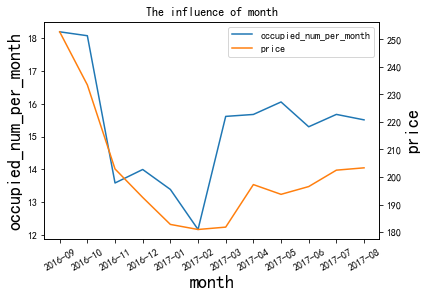

In [224]:
# 添加month列，用于统计每个月的入住量
raw_data_calendar['month'] = raw_data_calendar['date'].apply(lambda x: x[:7]).copy()

# 因2017年9月数据只到5号，所以剔除
data_calendar_1 = raw_data_calendar[raw_data_calendar['month'] < '2017-09'].copy()

# 按月份统计每月有人入住的天数
data_calendar_2 = data_calendar_1[data_calendar_1['available']=='f'][['listing_id', 'month']].groupby('month').count()/3585

# 按月份统计每月平均房屋价格
test_2 = date_fea_convert(data_calendar_1, ['price'], [0])#.price.astype(float)
test_2.price = test_2.price.astype(float)
test_3 = test_2[test_2['available'] == 't'][['month', 'price']].groupby('month').mean()

# 画图
doub_ylabel_plot(data_calendar_2.reset_index(), test_3.reset_index(), 'occupied_num_per_month', 'price', 'month')

In [13]:
df

,month,occupied_count,average_price
0,2016-09,65249,252.677308
1,2016-10,64821,233.416248
2,2016-11,48692,202.924416
3,2016-12,50169,192.601915
4,2017-01,47985,182.799671
5,2017-02,43598,180.961028
6,2017-03,55985,181.818742
7,2017-04,56198,197.252890
8,2017-05,57566,193.712295
9,2017-06,54849,196.535302


## 3.2、 问题2：什么样的店铺入住率高？

In [125]:
pd.Series(model_reg.feature_importances_, index=fea_data.columns).sort_values(ascending=False)[:10]

first_review                  0.202001
last_review                   0.144687
host_since                    0.129291
price                         0.098023
host_acceptance_rate          0.097004
cleaning_fee                  0.077568
host_response_rate            0.053877
extra_people                  0.039505
security_deposit              0.039019
cancellation_policy_strict    0.011961
dtype: float64

### 回答2：
对房屋入住率影响最大的特征前5位依次是：
- 首次评论时间（first_review）
- 最后评论时间（last_review）
- 营业时长（host_since）
- 单日价格（price）
- 订单接受率（host_acceptance_rate）

## 3.3、 问题3：什么样的店铺最令顾客满意（评分高）？

In [133]:
pd.Series(model_clf.feature_importances_, index=fea_data.columns).sort_values(ascending=False)[:10]

last_review             0.226554
first_review            0.198020
price                   0.187635
host_since              0.118391
host_acceptance_rate    0.047961
cleaning_fee            0.047518
host_response_rate      0.038596
extra_people            0.030621
security_deposit        0.017325
host_is_superhost_f     0.010311
dtype: float64

### 回答3：
对租客评分级别影响最大的特征前5位依次是：
- 最后评论时间（last_review）
- 首次评论时间（first_review）
- 单日价格（price）
- 营业时长（host_since）
- 订单接受率（host_acceptance_rate）

### 进一步分析各个特征的影响

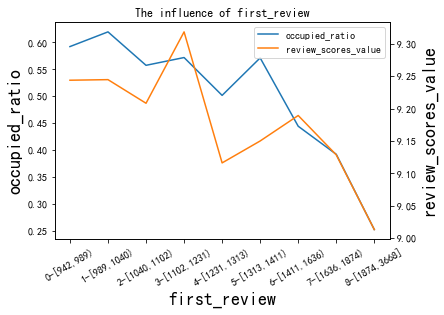

In [243]:
first_rewiew_occupied_df = see_con_fea_relation(listing_preprocess_df_7, 'first_review', 'occupied_ratio', 10)
first_rewiew_score_df = see_con_fea_relation(listing_preprocess_df_7, 'first_review', 'review_scores_value', 10)
doub_ylabel_plot(first_rewiew_occupied_df, first_rewiew_score_df, 'occupied_ratio', 'review_scores_value', 'first_review')

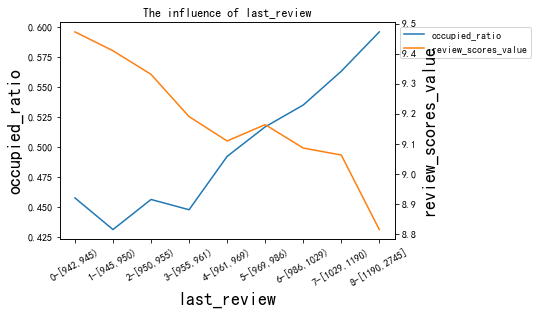

In [244]:
last_review_occupied_df = see_con_fea_relation(listing_preprocess_df_7, 'last_review', 'occupied_ratio', 10)
last_review_score_df = see_con_fea_relation(listing_preprocess_df_7, 'last_review', 'review_scores_value', 10)
doub_ylabel_plot(last_review_occupied_df, last_review_score_df, 'occupied_ratio', 'review_scores_value', 'last_review')

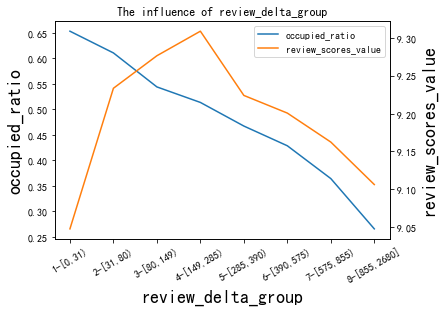

In [234]:
doub_ylabel_plot(review_delta_occupied_df, review_delta_score_df, 'occupied_ratio', 'review_scores_value', 'review_delta_group')

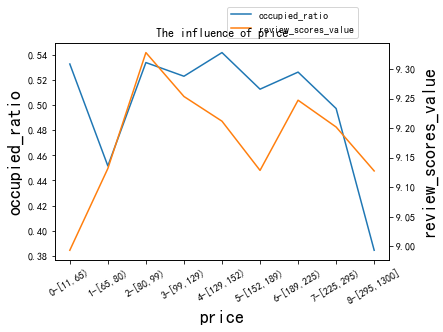

In [247]:
price_occupied_df = see_con_fea_relation(listing_preprocess_df_7, 'price', 'occupied_ratio', 10)
price_score_df = see_con_fea_relation(listing_preprocess_df_7, 'price', 'review_scores_value', 10)
doub_ylabel_plot(price_occupied_df, price_score_df, 'occupied_ratio', 'review_scores_value', 'price')

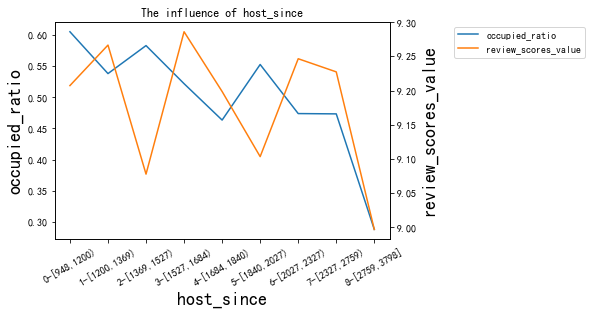

In [220]:
host_since_occupied_df = see_con_fea_relation(listing_preprocess_df_7, 'host_since', 'occupied_ratio', 10)
host_since_score_df = see_con_fea_relation(listing_preprocess_df_7, 'host_since', 'review_scores_value', 10)
doub_ylabel_plot(host_since_occupied_df, host_since_score_df, 'occupied_ratio', 'review_scores_value', 'host_since')

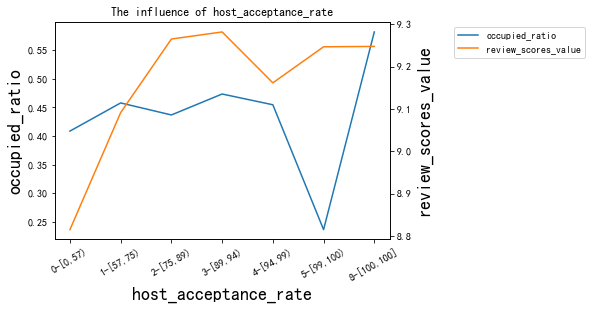

In [221]:
host_acceptance_rate_occupied_df = see_con_fea_relation(listing_preprocess_df_7, 'host_acceptance_rate', 'occupied_ratio', 10)
host_acceptance_rate_score_df = see_con_fea_relation(listing_preprocess_df_7, 'host_acceptance_rate', 'review_scores_value', 10)
doub_ylabel_plot(host_acceptance_rate_occupied_df, host_acceptance_rate_score_df, 'occupied_ratio', 'review_scores_value', 'host_acceptance_rate')

In [272]:
# 查看自变量（数值型变量）和因变量之间关系的函数
def see_con_fea_relation(df, fea_col, obj_col, n):
    group_col = 'group'
    
    # 找出fea_col的1/n分位数
    df_0 = df[fea_col].astype(int).sort_values().copy()
    sample_cnt = df_0.shape[0]
    div_lis = [df_0.values[int(np.floor(i))] for i in np.linspace(0, sample_cnt-1, n)]
    #print(div_lis)
    # 分组打标
    col_lis = [fea_col, obj_col]
    df_1 = df[col_lis].astype(float).copy()
    df_1[group_col] = np.zeros(sample_cnt)

    # 通过分位数将位于各个区间的数据分组打标
    zipped = list(zip(div_lis[:-1], div_lis[1:]))
    for i, tup in enumerate(zipped):
        index11 = df_1[fea_col] >= tup[0]
        if i < len(zipped) - 1:
            index22 = df_1[fea_col] < tup[1]
            index_com = index11 & index22
            df_1.loc[index_com, group_col] = str(i) + '-' + '[' + str(tup[0]) + ',' + str(tup[1]) + ')'
        else:
            index22 = df_1[fea_col] <= tup[1]
            index_com = index11 & index22
            df_1.loc[index_com, group_col] = str(i) + '-' + '[' + str(tup[0]) + ',' + str(tup[1]) + ']'

    return_df = df_1[[group_col, obj_col]].groupby(group_col).mean().copy()
   # print(df_1[[group_col, obj_col]].groupby(group_col).count())
    return return_df.reset_index().rename(columns={group_col: fea_col + '_' + group_col})

# 查看自变量（类别变量）和因变量之间关系的函数
def see_cate_fea_relation(df, x_fea, y_fea):
    val_count_df = pd.DataFrame(df[x_fea].value_counts())
    groupby_df = df[[x_fea, y_fea]].groupby(x_fea).mean()
    df = pd.merge(val_count_df, groupby_df, left_index=True, right_index=True).sort_values(by=y_fea, ascending=False)
    return df.reset_index().rename(columns={x_fea: 'sample number', 'index': x_fea})
                            #.style.bar(subset=[y_fea], align='mid', color=['#d65f5f', '#5fba7d'])

def plot_func(df):
    ax = df.plot(xticks=df.index)
    ax.set_xticklabels(df.iloc[:, 0])
    plt.xticks(rotation=30)
    plt.xlabel(df.columns[0], fontsize=18)

In [233]:
see_con_fea_relation(listing_preprocess_df_7, 'price', 'occupied_ratio', 10)

[11, 65, 80, 99, 129, 152, 189, 225, 295, 1300]
              occupied_ratio
group                       
0-[11,65)                290
1-[65,80)                304
2-[80,99)                247
3-[99,129)               351
4-[129,152)              307
5-[152,189)              296
6-[189,225)              275
7-[225,295)              327
8-[295,1300]             306


,price_group,occupied_ratio
0,"0-[11,65)",0.532598
1,"1-[65,80)",0.451553
2,"2-[80,99)",0.533746
3,"3-[99,129)",0.522862
4,"4-[129,152)",0.541674
5,"5-[152,189)",0.512576
6,"6-[189,225)",0.526154
7,"7-[225,295)",0.497194
8,"8-[295,1300]",0.384499


#### 离散变量对预测值的影响

In [273]:
see_cate_fea_relation(listing_preprocess_df_5, 'bedrooms', 'review_scores_value')

,bedrooms,sample number,review_scores_value
0,5.0,12,9.333333
1,4.0,40,9.300000
2,3.0,125,9.264000
3,1.0,1787,9.181869
4,2.0,500,9.164000
5,0.0,231,9.147186


In [274]:
see_cate_fea_relation(listing_preprocess_df_5, 'bathrooms', 'review_scores_value')

,bathrooms,sample number,review_scores_value
0,4.0,2,10.000000
1,4.5,1,10.000000
2,3.5,11,9.545455
3,1.5,166,9.313253
4,1.0,2091,9.185557
5,2.5,55,9.181818
6,0.0,7,9.142857
7,2.0,331,9.132931
8,3.0,16,8.750000
9,6.0,4,8.500000


In [275]:
see_cate_fea_relation(listing_preprocess_df_5, 'room_type', 'review_scores_value')

,room_type,sample number,review_scores_value
0,Shared room,51,9.333333
1,Private room,1038,9.179191
2,Entire home/apt,1614,9.174102


In [276]:
see_cate_fea_relation(listing_preprocess_df_5, 'bed_type', 'review_scores_value')

,bed_type,sample number,review_scores_value
0,Futon,47,9.446809
1,Pull-out Sofa,26,9.384615
2,Airbed,28,9.178571
3,Real Bed,2596,9.172958
4,Couch,6,8.833333


In [277]:
see_cate_fea_relation(listing_preprocess_df_5, 'host_identity_verified', 'review_scores_value')

,host_identity_verified,sample number,review_scores_value
0,t,2070,9.191787
1,f,633,9.137441


In [278]:
see_cate_fea_relation(listing_preprocess_df_5, 'is_location_exact', 'review_scores_value')

,is_location_exact,sample number,review_scores_value
0,f,354,9.268362
1,t,2349,9.165602


In [279]:
see_cate_fea_relation(listing_preprocess_df_5, 'cancellation_policy', 'review_scores_value')

,cancellation_policy,sample number,review_scores_value
0,moderate,774,9.312661
1,flexible,615,9.252033
2,strict,1248,9.095353
3,super_strict_30,66,8.515152
